In [1]:
from sklearn.datasets import make_classification

n_samples = 300
n_features = 5
n_informative = 2
n_redundant = 0
n_clusters = 1
random_state = 111

X, y = make_classification(n_samples = n_samples, n_features=n_features, n_redundant=n_redundant, n_informative=n_informative, random_state=random_state, n_clusters_per_class=n_clusters)

In [2]:
import plotly.graph_objects as go

fig = go.Figure(
    data = go.Parcoords(
        line = {
            'color': y, 
            'colorscale': [(0, 'gold'), (1, 'lightseagreen')]
        },
        dimensions = [
            {'label' : f"{i} dimension", 'values' : X[:, i]} for i in range(X.shape[1])
        ]
    )
)

fig.show()

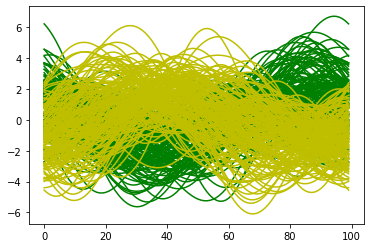

In [31]:
from math import ceil, sqrt, pi
import numpy as np
import pandas as pd

def andrew_curves(input: np.ndarray, m: int = 100):
    if not 1 <= len(input.shape) <= 2:
        raise ValueError("Only vectors (1D) and vectors collection (2D) are supported")

    X = np.reshape(input, (1, -1)) if len(input.shape) == 1 else input.copy()

    _, dims = X.shape

    # theta angles
    t = np.linspace(-pi, pi, m)

    # matrix A [m x n]:
    # m: range of theta angles
    # n: amount of component for Fourier function
    A = np.empty((m, dims))

    A[:, 0] = [1. / sqrt(2.)] * m

    for dim_idx in range(1, dims):
        c = ceil(dim_idx/2)
        column = np.sin(c * t) if dim_idx % 2 == 1 else np.cos(c * t)
        A[:, dim_idx] = column[:]

    andrew_curves = np.dot(A, X.T).T

    return np.ravel(andrew_curves) if andrew_curves.shape[0] == 1 else andrew_curves

data = pd.DataFrame(andrew_curves(X))
data['class'] = y

fst_dim = data[data['class'] == 1]
snd_dim = data[data['class'] == 0]

ax = fst_dim.iloc[:, :-1].T.plot(color='g', legend = None)

snd_dim.iloc[:, :-1].T.plot(ax=ax, color='y', legend = None)

